## Deutsche Bahn Call-A-Bike Data Maps

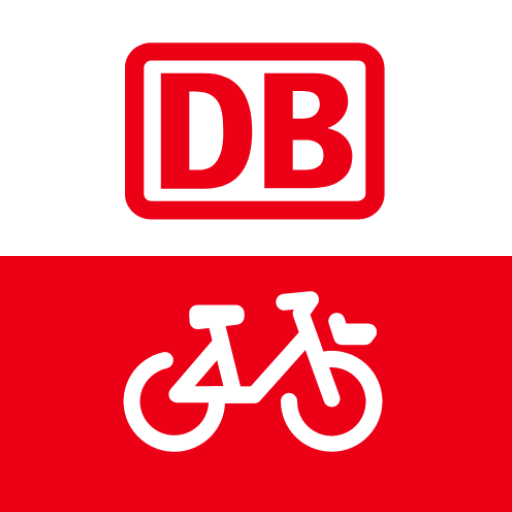



#### 1. Import and examine the data sets

### 1. Import and examine the data sets

In [1]:
# Import python libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

import folium
import json

#Import plotly libraries
import plotly.express as px
import plotly.graph_objects as go

#Import a simple GPX parser
import gpxpy
import gpxpy.gpx

#### 1.1 Import the DB data

In [2]:
# set the path and import the data

path = r'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Data'
df_biketrips = pd.read_pickle(os.path.join(path, 'biketrips_stations.pkl'))

In [3]:
# view first 25 rows

df_biketrips.head(25)

,index,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,...,Month,Week,Weekday,day_trip,customer_trips,user_type,avg_customers_day,station_type,bike_relocated,bike_inserted
0,0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,7,Typical,56.0,Busy,False,True
1,1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,59,Frequent,73.0,Busy,False,False
2,2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,183,High,30.0,Typical,False,True
3,3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,174,High,92.0,Busy,False,False
4,4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,210,High,40.0,Typical,False,False
5,5,21367381,143552,60A788942F6A49BF54DB9013DB05428F897FCCCE,2014-01-01 03:07:07,2014-01-01 03:20:08,208292,212607,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,18,Typical,54.0,Busy,False,True
6,6,21367723,143577,708275C3A732D3BD47E97F1E0AC3AE01735FA170,2014-01-01 04:27:51,2014-01-01 04:45:18,200502,198086,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,180,High,63.0,Busy,False,True
7,7,21367824,143580,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,2014-01-01 04:58:33,2014-01-01 05:12:31,213680,201326,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,54,Frequent,33.0,Typical,False,False
8,8,21366959,119948,092D25BAD64832AE3F69488573BA5C398C25B51D,2014-01-01 01:08:18,2014-01-01 01:13:02,140804,198086,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,58,Frequent,60.0,Busy,False,True
9,9,21366990,120207,528147DF06D7074EA517BFAE244FC0E25CB2637C,2014-01-01 01:17:32,2014-01-01 01:21:45,138389,131873,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,271,High,43.0,Typical,False,True


In [4]:
# view last 25 rows

df_biketrips.tail(25)

,index,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,...,Month,Week,Weekday,day_trip,customer_trips,user_type,avg_customers_day,station_type,bike_relocated,bike_inserted
8265290,8265290,46379667,117256,39F4E52592419938DE8906E955B8060E057DE78D,2017-05-15 20:41:50,2017-05-15 20:51:03,140801,208295,2017-05-15,2017-05-15,...,May,20,Monday,yes,343,High,39.0,Typical,True,False
8265291,8265291,46379702,119968,7111FF009F27E815EC4D2E1B5E046411906DEB2F,2017-05-15 20:43:17,2017-05-15 20:52:00,131646,213856,2017-05-15,2017-05-15,...,May,20,Monday,yes,105,High,73.0,Busy,False,False
8265292,8265292,46381067,143772,29DF9BC7C5582F28A33B959778D3532738593728,2017-05-15 21:36:41,2017-05-15 21:49:46,252492,213235,2017-05-15,2017-05-15,...,May,20,Monday,yes,9,Typical,33.0,Typical,False,False
8265293,8265293,46382537,117550,6A7E1EA7421B080A4A83F7F9E4FABF0B214BC828,2017-05-15 22:50:50,2017-05-15 23:16:11,171372,138387,2017-05-15,2017-05-15,...,May,20,Monday,yes,18,Typical,21.0,Typical,True,False
8265294,8265294,46382994,119958,114E560D4364344FEF804CA8047C3DD0E81D7FDD,2017-05-15 23:25:22,2017-05-15 23:40:36,138375,248511,2017-05-15,2017-05-15,...,May,20,Monday,yes,40,Frequent,25.0,Typical,True,False
8265295,8265295,46383356,143585,FA1596CDD83D286B363E839C01C89991E286C452,2017-05-15 23:58:04,2017-05-16 00:07:20,198077,131547,2017-05-15,2017-05-16,...,May,20,Monday,no,80,High,135.0,High,True,False
8265296,8265296,46379905,119673,714A0E29AF0213C7AAE9866989D4277117A70A23,2017-05-15 20:50:55,2017-05-15 21:11:18,131872,131648,2017-05-15,2017-05-15,...,May,20,Monday,yes,2,Low,81.0,Busy,False,False
8265297,8265297,46381737,107852,DBDF4D7D3898EA4D7683681D793874E3022E9CC1,2017-05-15 22:06:44,2017-05-15 22:17:44,245204,208307,2017-05-15,2017-05-15,...,May,20,Monday,yes,48,Frequent,30.0,Typical,True,False
8265298,8265298,46381791,107772,D7E83AD73A65907AB8C9EEDE50F66842ACAF711A,2017-05-15 22:09:12,2017-05-15 22:18:07,140801,204031,2017-05-15,2017-05-15,...,May,20,Monday,yes,50,Frequent,39.0,Typical,False,False
8265299,8265299,46381994,143538,2970007E56BBF9AD90E0E6E4CC0FEECD00419F0B,2017-05-15 22:18:17,2017-05-15 22:28:08,131889,244944,2017-05-15,2017-05-15,...,May,20,Monday,yes,72,High,61.0,Busy,False,False


In [5]:
# find the data types

df_biketrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8265315 entries, 0 to 8265314
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   index                  int64         
 1   booking_hal_id         object        
 2   vehicle_hal_id         object        
 3   customer_hal_id        object        
 4   datetime_from          datetime64[ns]
 5   datetime_to            datetime64[ns]
 6   start_station_id       object        
 7   end_station_id         object        
 8   date_from              datetime64[ns]
 9   date_to                datetime64[ns]
 10  hour_from              int64         
 11  hour_to                int64         
 12  duration_trip_minutes  float64       
 13  station_status         object        
 14  start_longitude        float64       
 15  start_latitude         float64       
 16  end_longitude          float64       
 17  end_latitude           float64       
 18  start_station         

In [6]:
# count the unique values in the columns

df_biketrips.nunique()

index                    8265315
booking_hal_id           8265315
vehicle_hal_id              2681
customer_hal_id           262527
datetime_from            7716931
datetime_to              7703108
start_station_id             208
end_station_id               208
date_from                   1231
date_to                     1232
hour_from                     24
hour_to                       24
duration_trip_minutes      28002
station_status                 3
start_longitude              206
start_latitude               205
end_longitude                206
end_latitude                 205
start_station                206
end_station                  206
Year                           4
Month                         12
Week                          53
Weekday                        7
day_trip                       2
customer_trips              1069
user_type                      4
avg_customers_day             75
station_type                   4
bike_relocated                 2
bike_inser

In [7]:
# find the number of rows and columns

df_biketrips.shape

(8265315, 31)

The dataframe matches the data that was exported.

#### 1.2 Import the tourist sites data and extract the coordinates

In [8]:

def extract_coordinates(gpx_file_path):
    # Open the GPX file
    with open(gpx_file_path, 'r') as gpx_file:
        # Parse the GPX data
        gpx = gpxpy.parse(gpx_file)

          # Create an empty list to store the data frames
        dfs = []

        # Extract coordinates from waypoints
        for waypoint in gpx.waypoints:
            name = waypoint.name
            latitude = waypoint.latitude
            longitude = waypoint.longitude

            # Create a data frame with the current waypoint data
            df = pd.DataFrame({'Name': [name], 'Latitude': [latitude], 'Longitude': [longitude]})
            
            # Append the data frame to the list
            dfs.append(df)

        # Extract coordinates from track points
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    name = point.name
                    latitude = point.latitude
                    longitude = point.longitude

                    # Create a data frame with the current track point data
                    df = pd.DataFrame({'Name': [name], 'Latitude': [latitude], 'Longitude': [longitude]})

                    # Append the data frame to the list
                    dfs.append(df)

        # Concatenate the list of data frames into a single data frame
        concatenated_df = pd.concat(dfs, ignore_index=True)

        return concatenated_df

# Specify the path to your GPX file
gpx_file_path =  r'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Data/germany-hamburg.gpx'


# Call the function to extract coordinates into a DataFrame
df_tourists = extract_coordinates(gpx_file_path)

df_tourists


,Name,Latitude,Longitude
0,Alster Lake,53.565063,10.006442
1,Altstadter Hof,53.549675,10.002403
2,Beatles Square Monument,53.549898,9.957300
3,Bergedorf Windmill,53.493241,10.215246
4,Bieberhaus,53.554629,10.007209
5,Brooks Bridge,53.544418,9.989704
6,Castle Hill Ronneburg,53.435839,10.005249
7,Cathedral Square of Hammaburg,53.549251,9.997391
8,Chilehaus,53.548287,10.001976
9,Concentration Camp Memorial,53.429601,10.230415


There are 50 tourist map points.

In [105]:
df_stations = df_biketrips.groupby('start_station').first().reset_index()[['start_station', 'start_latitude', 'start_longitude', 'avg_customers_day', 'station_type']]
columns = ['Name', 'Latitude', 'Longitude', 'Avg. No. Customers', 'Type']
df_stations.set_axis(columns, axis=1, inplace=True)
df_stations

,Name,Latitude,Longitude,Avg. No. Customers,Type
0,Allende-Platz/Grindelhof,53.567845,9.982728,135.0,High
1,Alsenstraße/Düppelstraße,53.563037,9.948345,64.0,Busy
2,Alsterdorf Markt/Evangelische Stiftung,53.612091,10.023946,5.0,Low
3,Alsterdorfer Straße/Fuhlsbüttler Straße,53.620000,10.032000,10.0,Low
4,Alsterschwimmhalle/Ifflandstraße,53.560781,10.022148,36.0,Typical
...,...,...,...,...,...
201,Wiesendamm/Roggenkamp,53.586958,10.042993,50.0,Busy
202,Wilhelmsburger Platz/Zur Schleuse,53.522794,10.014810,21.0,Typical
203,Winterhuder Weg/ Zimmerstraße,53.575308,10.020450,54.0,Busy
204,Zentralbibliothek / Münzstraße,53.550332,10.008849,23.0,Typical


#### 1.3 Combine the stations and tourist map datasets

In [13]:
# Concatenate the dataframes
df_tourist_map = pd.concat([df_stations, df_tourists], ignore_index=True)
df_tourist_map

,Name,Latitude,Longitude
0,Allende-Platz/Grindelhof,53.567845,9.982728
1,Alsenstraße/Düppelstraße,53.563037,9.948345
2,Alsterdorf Markt/Evangelische Stiftung,53.612091,10.023946
3,Alsterdorfer Straße/Fuhlsbüttler Straße,53.620000,10.032000
4,Alsterschwimmhalle/Ifflandstraße,53.560781,10.022148
...,...,...,...
251,St. Michaelis Church,53.548404,9.978858
252,St. Pauli Landing Stages,53.545591,9.968508
253,Tax Office Hamburg-Hansa,53.550461,10.003315
254,Tierpark Hagenbeck,53.596389,9.937778


### 2. Mapping stations and tourist destinations 

In [46]:
# Change the working directory for saving maps and show directory path

os.chdir(path = r'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Analysis/Maps')
os.getcwd()

'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Analysis/Maps'

#### 2.1 DB Bike Stations and Tourist Attraction Maps

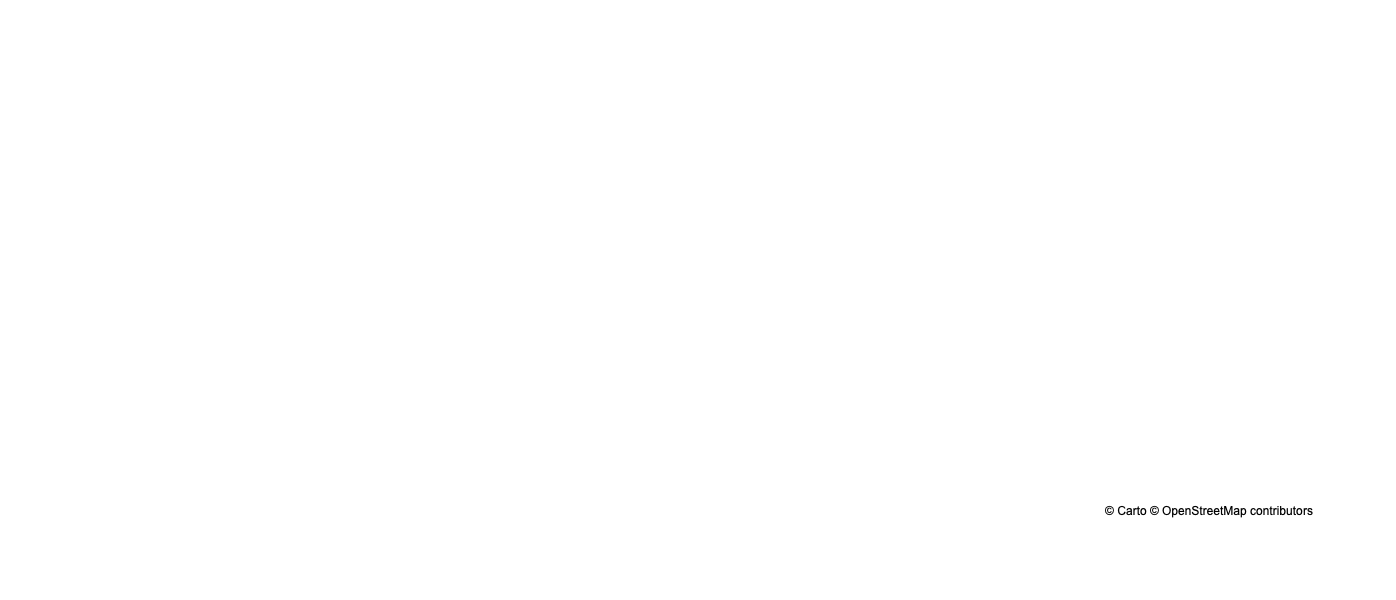

In [101]:
# Create a scatter mapbox plot using Plotly Express
fig = px.scatter_mapbox(df_stations,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Name",
                        color_discrete_sequence = ['#DC3220'],
                        zoom = 9.5,
                       height = 600,
                        width = 800
                       )

# Create a layout for the map
# Update layout settings
fig.update_layout(mapbox_style = "carto-positron", 
                 showlegend=True)

fig.write_image("DB_stations.png")  
fig.write_html("DB_stations.html")  

# Display the plot
fig.show()

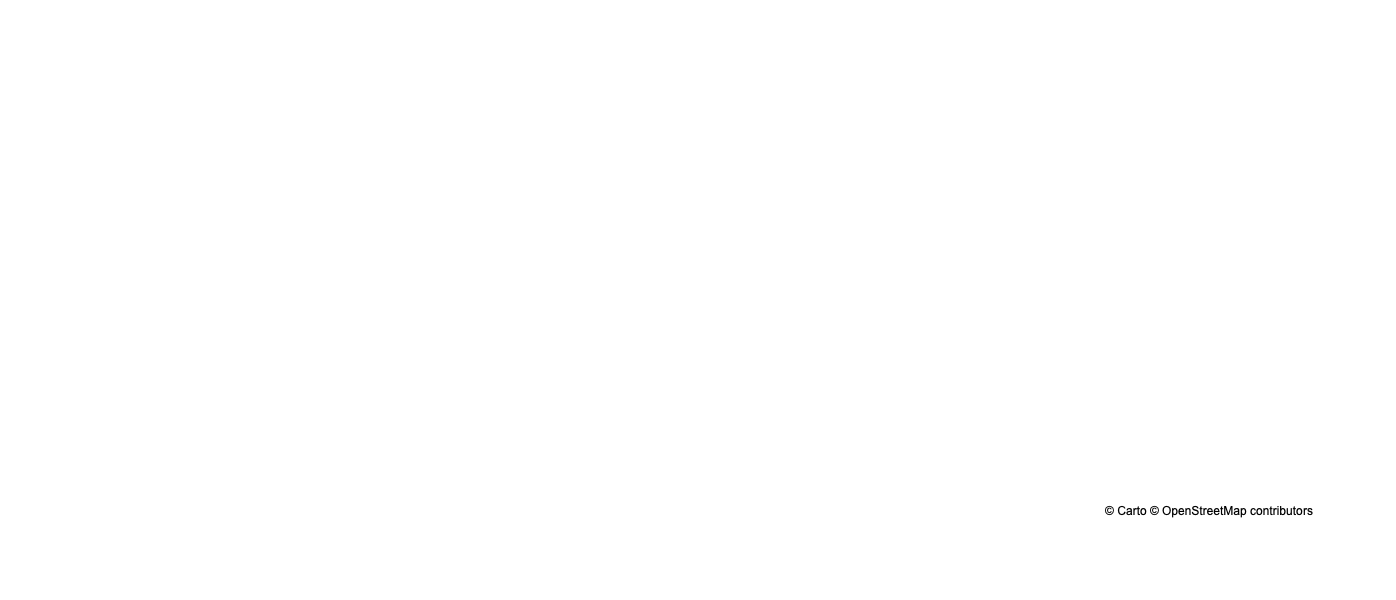

In [48]:
# Create a scatter mapbox plot using Plotly Express
fig = px.scatter_mapbox(df_tourists,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Name",
                        color_discrete_sequence = ['#005AB5'],
                        zoom = 9.5,
                        height = 600,
                        width = 800
                       )

# Create a layout for the map
# Update layout settings
fig.update_layout(mapbox_style = "carto-positron", 
                 showlegend=True)

fig.write_image("tourist_stations.png")  
fig.write_html("tourist_stations.html")  

# Display the plot
fig.show()

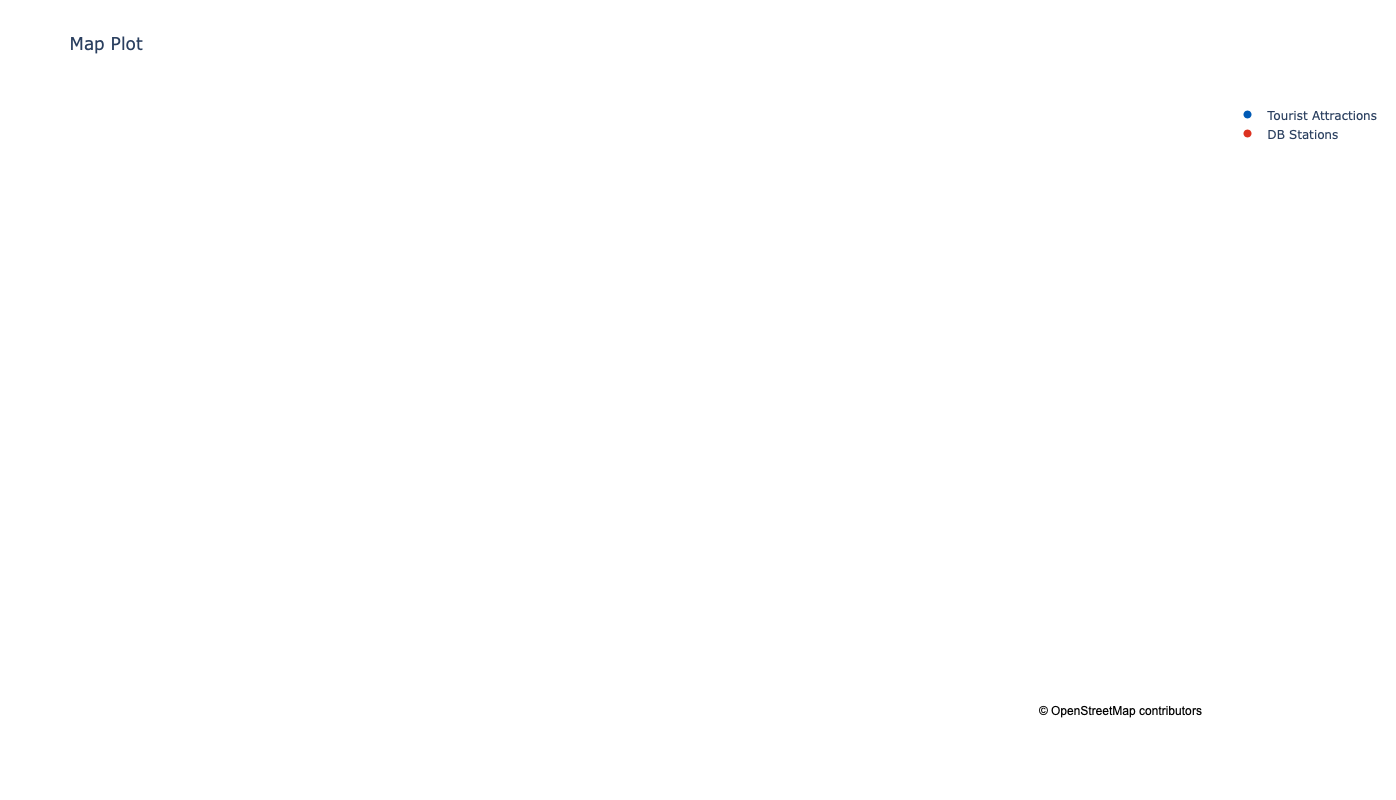

In [112]:
# Create a Scattermapbox trace for df_tourists
trace_tourists = go.Scattermapbox(
    lat=df_tourists['Latitude'],
    lon=df_tourists['Longitude'],
    mode='markers',
    marker=dict(
        color='#005AB5',
        size=8
    ),
    text=df_tourists['Name'],
    name='Tourist Attractions'
)

# Create a Scattermapbox trace for df_stations
trace_stations = go.Scattermapbox(
    lat=df_stations['Latitude'],
    lon=df_stations['Longitude'],
    mode='markers',
    marker=dict(
        color='#DC3220',
        size=8
    ),
    text = df_stations['Name'],
    name='DB Stations'
)

# Create a layout for the map
layout = go.Layout(
    title='Map Plot',
    mapbox=dict(
        center=dict(lat=53.55, lon=9.95),
        style='open-street-map',
        zoom=10
    ),
    showlegend=True,
    height=800,  # Adjust the height of the map
    width=1100   # Adjust the width of the map
)

# Create a Figure object and add the traces to it
fig = go.Figure(data=[trace_tourists, trace_stations], layout=layout)


fig.write_image("stations_map.png")  
fig.write_html("stations_map.html")  

# Show the map
fig.show()


#### 2.2 Location of the Busy DB Bike Stations

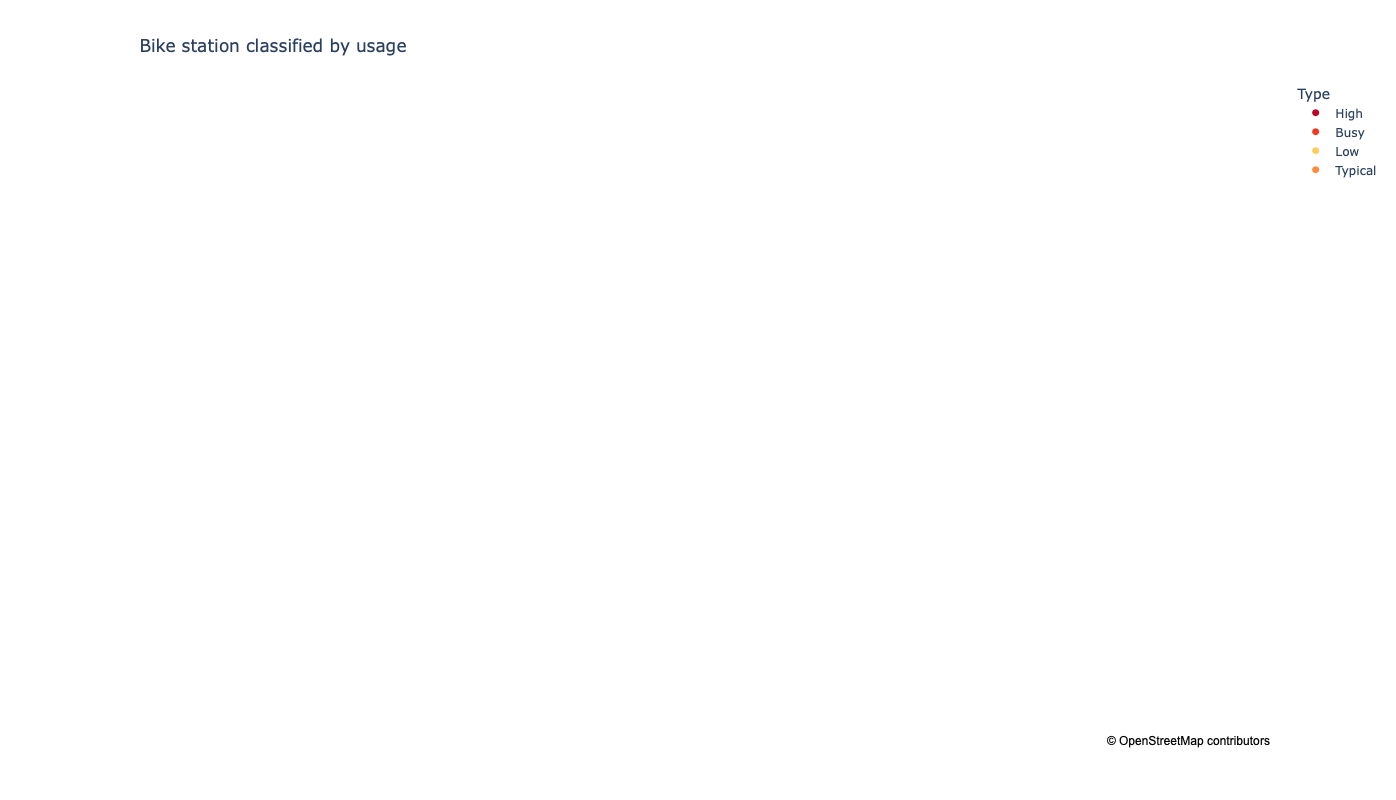

In [144]:
# Plot the busy stations

fig = px.scatter_mapbox(df_stations, 
                        lat = 'Latitude', lon = 'Longitude', hover_name = 'Name', hover_data = ['Type'],
                         color = 'Type',  color_discrete_sequence = ["#bd0026",  "#f03b20", "#fecc5c", "#fd8d3c",], center = dict(lat=53.55, lon=9.95), zoom=10)
fig.update_traces(
    marker={'size': 7})
    
fig.update_layout(

    mapbox_style="open-street-map",
    margin=dict(l=140, r=40, b=50, t=80),
    title={
        'text': 'Bike station classified by usage',
        'y':0.95,
        'x':0.1,
        'xanchor': 'auto',
        'yanchor': 'top'},
      width=1100,
    height=800
)
  

fig.write_image('Station_Type_Map.png')
fig.write_html('Station_Type_Map.html')

fig.show()

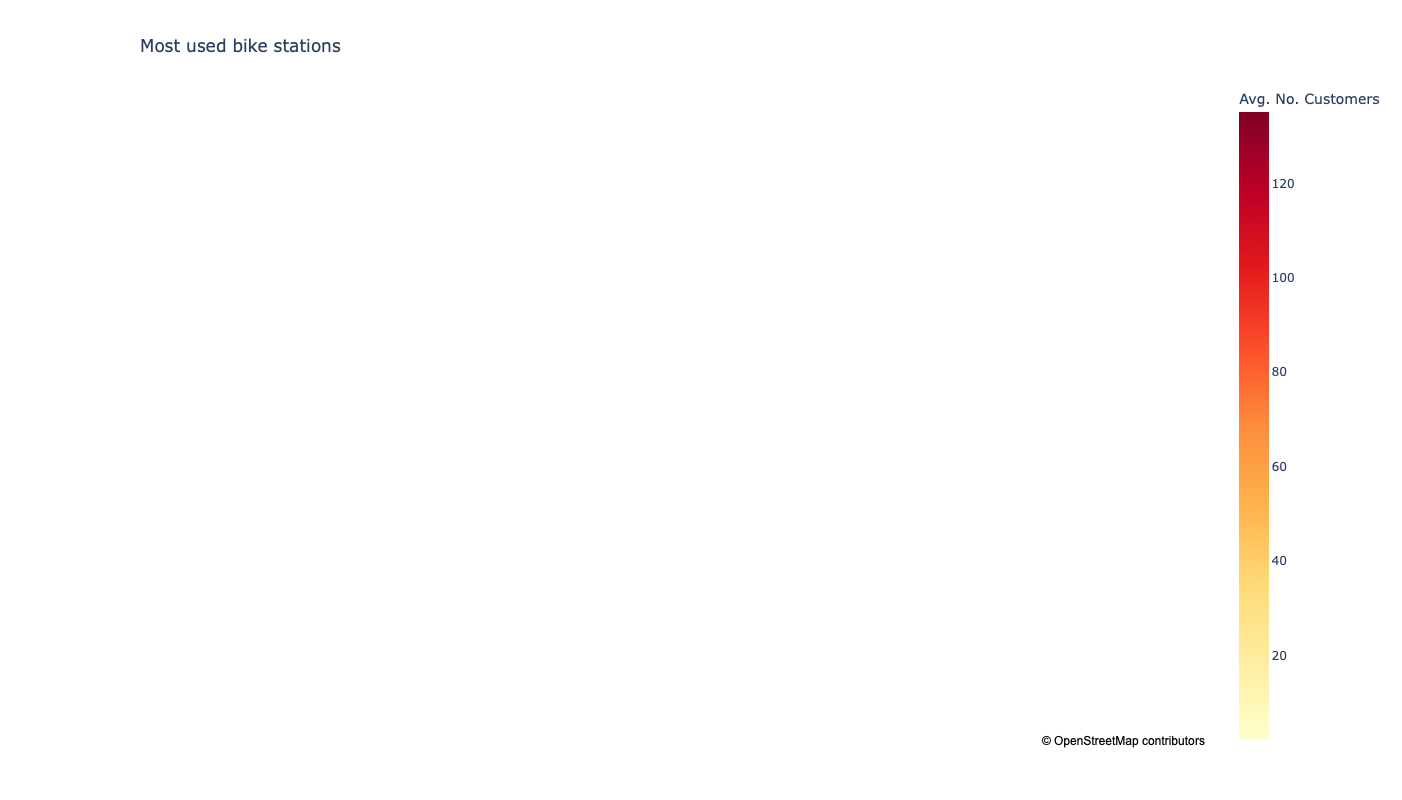

In [133]:
# Plot the busy stations

fig = px.scatter_mapbox(df_stations, 
                        lat = 'Latitude', lon = 'Longitude', hover_name = 'Name', hover_data = ['Avg. No. Customers'],
                         color = 'Avg. No. Customers', color_continuous_scale = 'YlOrRd', center = dict(lat=53.55, lon=9.95), zoom=10)
fig.update_traces(
    marker={'size': 7})
    
fig.update_layout(

    mapbox_style="open-street-map",
    margin=dict(l=140, r=40, b=50, t=80),
    title={
        'text': 'Most used bike stations',
        'y':0.95,
        'x':0.1,
        'xanchor': 'auto',
        'yanchor': 'top'},
      width=1100,
    height=800
)
  

fig.write_image("Avg_Customers_Map.png")
fig.write_html('Avg_Customers_Map.html')

fig.show()

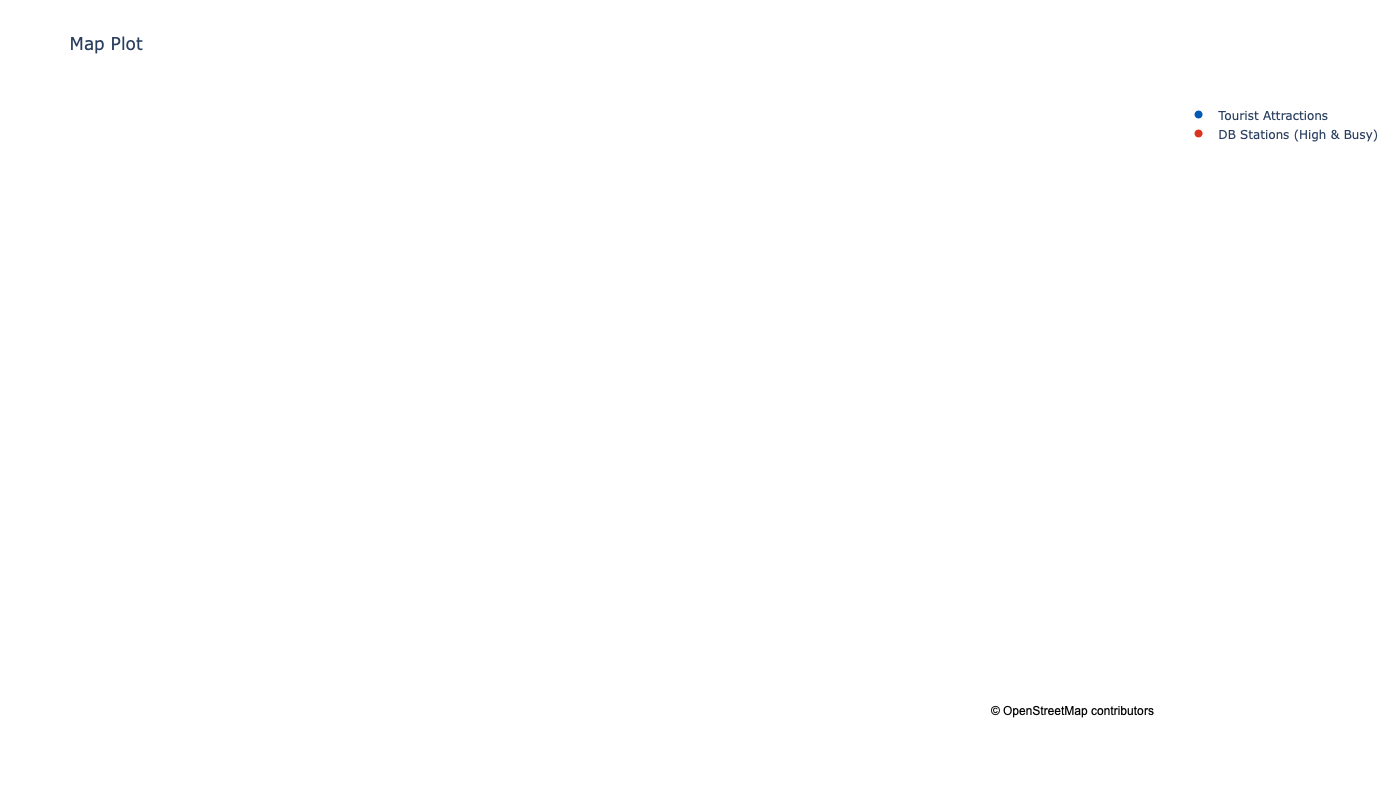

In [165]:
data = df_stations[df_stations['Type'].isin(['Busy', 'High'])]

# Create a Scattermapbox trace for df_tourists
trace_tourists = go.Scattermapbox(
    lat=df_tourists['Latitude'],
    lon=df_tourists['Longitude'],
    mode='markers',
    marker=dict(
        color='#005AB5',
        size=8
    ),
    text=df_tourists['Name'],
    name='Tourist Attractions'
)

# Create a Scattermapbox trace for df_stations
trace_stations = go.Scattermapbox(
    lat=data['Latitude'],
    lon=data['Longitude'],
    mode='markers',
    marker=dict(
        color='#DC3220',
        size=8
    ),
    text = data['Name'],
    name='DB Stations (High & Busy)'
)

# Create a layout for the map
layout = go.Layout(
    title='Map Plot',
    mapbox=dict(
        center=dict(lat=53.55, lon=9.95),
        style='open-street-map',
        zoom=10
    ),
    showlegend=True,
    height=800,  # Adjust the height of the map
    width=1100   # Adjust the width of the map
)

# Create a Figure object and add the traces to it
fig = go.Figure(data=[trace_tourists, trace_stations], layout=layout)


fig.write_image("stations_map.png")  
fig.write_html("stations_map.html")  

# Show the map
fig.show()

### 3. Bike relocations

In [145]:
# Find the number of bikes relocated per station

df_out = df_biketrips.groupby('end_station')['bike_relocated'].sum().sort_values(ascending = False).reset_index().head(20)
df_out

,end_station,bike_relocated
0,Landungsbrücke/Hafentor,13378
1,Am Kaiserkai/Großer Grasbrook,9789
2,Jungfernstieg / Neuer Jungfernstieg,9715
3,Jungfernstieg / Ballindamm,8366
4,Mannesallee/Veringstraße,7163
5,Saarlandstraße/Wiesendamm,6199
6,Lortzingstraße/Friedrichsberger Straße,6043
7,Rothenburgsort/Marktplatz/Lindleystraße,5394
8,Mönckebergstraße / Steintorwall,5285
9,Krausestraße/Eilbektal,4882


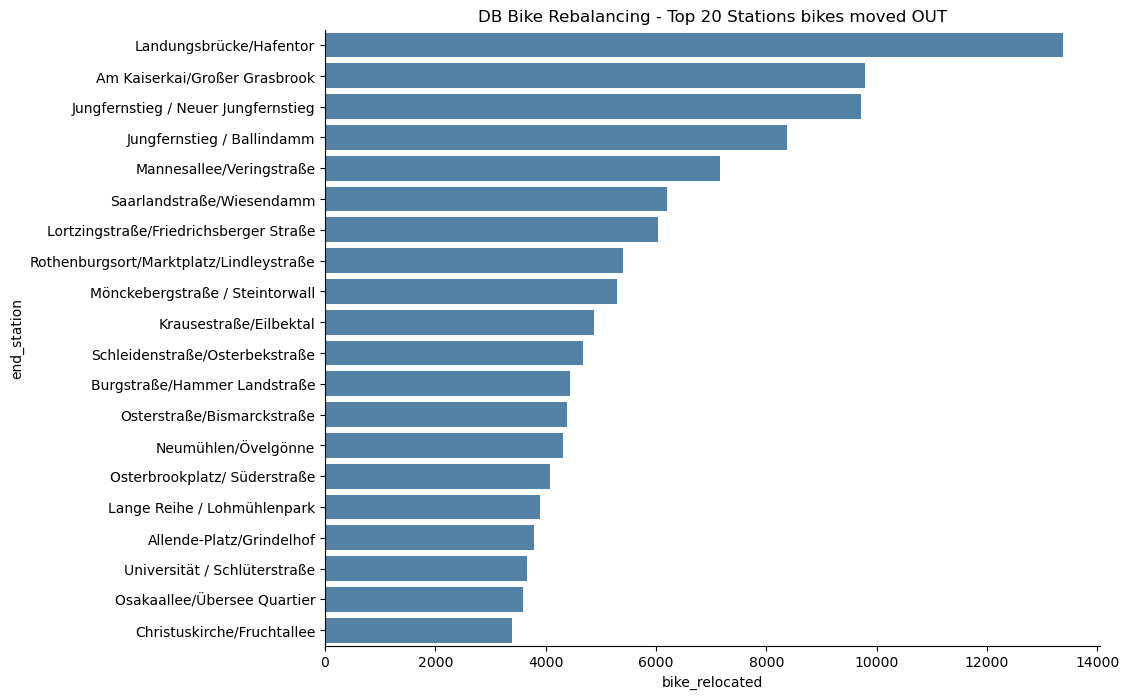

In [148]:
# Plot the top 20 stations for bikes relocated
X = df_out['bike_relocated']
Y = df_out['end_station']

plt.figure(figsize=(10,8))
plt.title('DB Bike Rebalancing - Top 20 Stations bikes moved OUT') 
plt.xlabel('Count of bikes moved') 
sns.barplot(x = X, y = Y, orient = "h", color = 'steelblue')

# remove the top and right spines
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Exporting the scatter plot with axis showing
plt.savefig("Rebalancing_bikes_out.png", bbox_inches='tight') 

plt.show()

The top five stations customers end up at (stations where bikes are moved out marked in bold):

* **Allende-Platz/Grindelhof**
* Schulterblatt/Eifflerstraße
* **Jungfernstieg / Ballindamm**
* Goldbekplatz / Semperstraße
* **Landungsbrücke/Hafentor**

In [149]:
# Find the number of bikes inserted per station
df_in = df_biketrips.groupby('start_station')['bike_inserted'].sum().sort_values(ascending = False).reset_index().head(20)
df_in

,start_station,bike_inserted
0,Hauptbahnhof West / Glockengießer Wall,16857
1,Hauptbahnhof Ost / Hachmannplatz,14598
2,Bahnhof Altona West / Busbahnhof,10635
3,Berliner Tor / Berlinertordamm,7648
4,Bahnhof Altona Ost/Max-Brauer-Allee,7646
5,U-Bahn Schlump,6797
6,Schleidenstraße/Osterbekstraße,6288
7,Lohmühlenstraße / Steindamm,6224
8,Saarlandstraße/Wiesendamm,5818
9,Lange Reihe / Lohmühlenpark,4934


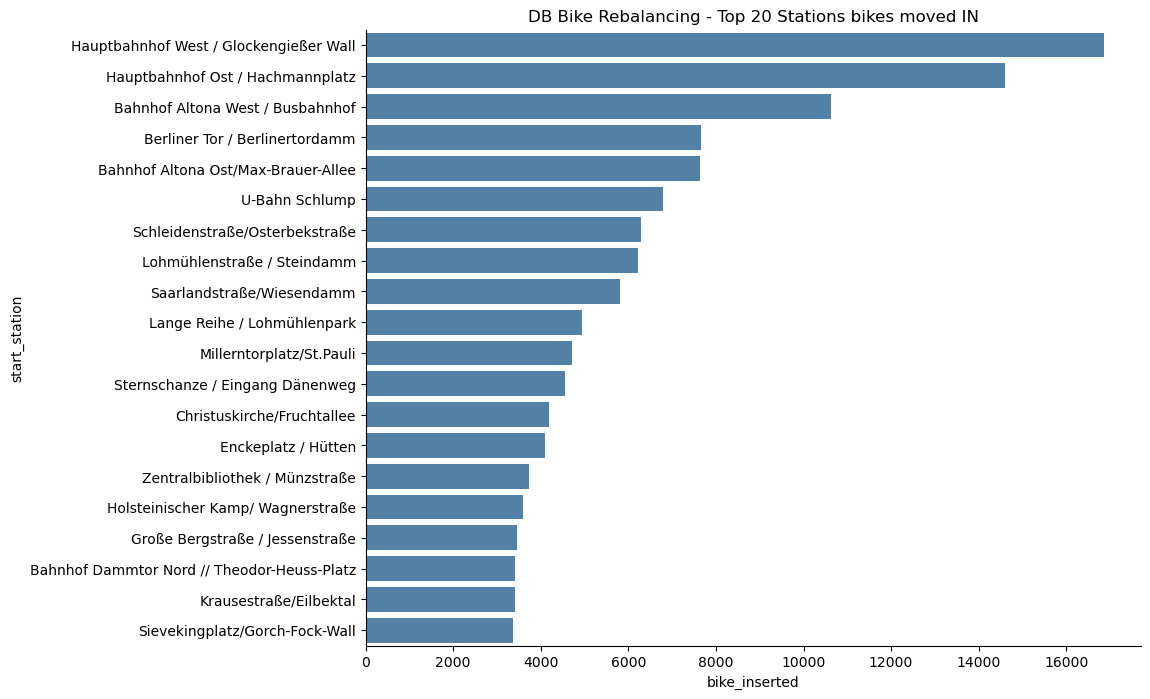

In [151]:
# Plot the top 20 stations for bikes inserted 

Y = df_in['start_station']

plt.figure(figsize=(10,8))
plt.title('DB Bike Rebalancing - Top 20 Stations bikes moved IN') 
plt.xlabel('Count of bikes moved') 
sns.barplot(x = X, y = Y, orient = "h", color = 'steelblue' )

# remove the top and right spines
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Exporting the scatter plot with axis showing
plt.savefig("Rebalancing_bikes_in.png", bbox_inches='tight') 

plt.show()

The top five stations customers start out from:
* Allende-Platz/Grindelhof                  
* Schulterblatt/Eifflerstraße               
* Goldbekplatz / Semperstraße               
* Jungfernstieg / Ballindamm                
* Mundsburg / Schürbeker Straße    

**It would appear that customers start out from these Bahnhof stations and Berliner Tor, but they are not popular destnations**

### 4. Mapping the Stations

In [3]:
# Import the ".json" file for the UK Regions
f = open(r'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/germanystates.geojson',)

# returns JSON object asa dictionary
germany = json.load(f)

# Iterating through the json list
for i in germany['features']:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[8.702691404635262, 47.714781967698215], [8.674364764592143, 47.704591855540215], [8.672476321922602, 47.68513800505675], [8.69249381421974, 47.69532811721476], [8.716665880389868, 47.68976987421948], [8.702691404635262, 47.714781967698215]]], [[[10.447990119825324, 48.93898498740753], [10.429861070197727, 48.94755394535858], [10.424195742189102, 48.96376548742813], [10.40946588936668, 48.976966314541905], [10.380006183721836, 48.99966247343928], [10.351679543678717, 49.00591549680896], [10.345258838602277, 49.01680038934138], [10.349791101009176, 49.028380062248196], [10.320331395364331, 49.025369347292425], [10.302202345736735, 49.0385701744062], [10.272742640091892, 49.04250726319452], [10.251592082193028, 49.04945506693862], [10.257257410201653, 49.05964517909662], [10.245171377116588, 49.074467160417356], [10.249703639523489, 49.09160507631945], [10.227797704556808, 49.089983922112495], [10.215711671471745,

Map Hamburg using key_on = 'properties.name'

In [49]:
# creating a dataframe without duplicate user_id
bike_stations = df_biketrips.drop_duplicates('start_station_id', keep='last')
bike_stations.head()

,index,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,...,Month,Week,Weekday,day_trip,customer_trips,user_type,avg_customers_day,station_type,bike_relocated,bike_inserted
7397569,7397569,43550541,119715,DFF0F91EE5333E3107550109C8F4DA6FC65F2531,2016-12-30 18:09:43,2016-12-30 18:13:55,242731,242645,2016-12-30,2016-12-30,...,December,52,Friday,yes,82,High,NaN,NaN,True,False
7935514,7935514,45351553,119741,6DDC7F5DF2637DB32FBA3C8B15CFE99BB8E9B779,2017-04-05 02:14:58,2017-04-05 02:22:20,138370,131641,2017-04-05,2017-04-05,...,April,14,Wednesday,yes,142,High,NaN,NaN,False,False
8229482,8229482,46278554,119841,8610566ACFB2B6C3D20AD8D2CEBE1172F352D636,2017-05-12 14:08:18,2017-05-12 14:14:37,131887,131885,2017-05-12,2017-05-12,...,May,19,Friday,yes,1580,High,20.0,Typical,False,False
8254258,8254258,46353153,117491,CFF2EEBAC8EE9D61C0089B0EEEC4C05398DED1D7,2017-05-15 08:38:30,2017-05-15 08:55:09,268358,131651,2017-05-15,2017-05-15,...,May,20,Monday,yes,30,Frequent,2.0,Low,False,False
8257194,8257194,46362291,143794,CAD029A87A135C2CE37A68F5B758D207B9047962,2017-05-15 13:49:47,2017-05-15 17:34:25,247847,247847,2017-05-15,2017-05-15,...,May,20,Monday,yes,1,Low,2.0,Low,True,False


In [50]:
bike_stations['customers'] = df_biketrips.groupby('start_station_id')['booking_hal_id'].transform('count')
bike_stations.head()

/var/folders/qk/vbtzdx7528qccv0lwz6yvkvc0000gn/T/ipykernel_21292/2972923181.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,...,Week,Weekday,day_trip,customer_trips,user_type,avg_customers_day,station_type,bike_relocated,bike_inserted,customers
7397569,7397569,43550541,119715,DFF0F91EE5333E3107550109C8F4DA6FC65F2531,2016-12-30 18:09:43,2016-12-30 18:13:55,242731,242645,2016-12-30,2016-12-30,...,52,Friday,yes,82,High,NaN,NaN,True,False,4197
7935514,7935514,45351553,119741,6DDC7F5DF2637DB32FBA3C8B15CFE99BB8E9B779,2017-04-05 02:14:58,2017-04-05 02:22:20,138370,131641,2017-04-05,2017-04-05,...,14,Wednesday,yes,142,High,NaN,NaN,False,False,29996
8229482,8229482,46278554,119841,8610566ACFB2B6C3D20AD8D2CEBE1172F352D636,2017-05-12 14:08:18,2017-05-12 14:14:37,131887,131885,2017-05-12,2017-05-12,...,19,Friday,yes,1580,High,20.0,Typical,False,False,25653
8254258,8254258,46353153,117491,CFF2EEBAC8EE9D61C0089B0EEEC4C05398DED1D7,2017-05-15 08:38:30,2017-05-15 08:55:09,268358,131651,2017-05-15,2017-05-15,...,20,Monday,yes,30,Frequent,2.0,Low,False,False,94
8257194,8257194,46362291,143794,CAD029A87A135C2CE37A68F5B758D207B9047962,2017-05-15 13:49:47,2017-05-15 17:34:25,247847,247847,2017-05-15,2017-05-15,...,20,Monday,yes,1,Low,2.0,Low,True,False,1307


In [51]:
data_plot1 = bike_stations[['end_station_id', 'end_latitude', 'end_longitude', 'customers']]

data_plot1


,end_station_id,end_latitude,end_longitude,customers
7397569,242645,53.459959,9.980473,4197
7935514,131641,53.577579,9.963063,29996
8229482,131885,53.548300,9.986950,25653
8254258,131651,53.551700,10.016000,94
8257194,247847,53.640835,9.950095,1307
...,...,...,...,...
8265310,208307,53.584582,10.033690,68075
8265311,243618,53.575573,9.944487,50282
8265312,131889,53.551800,9.933870,42712
8265313,244939,53.546932,10.057613,110526


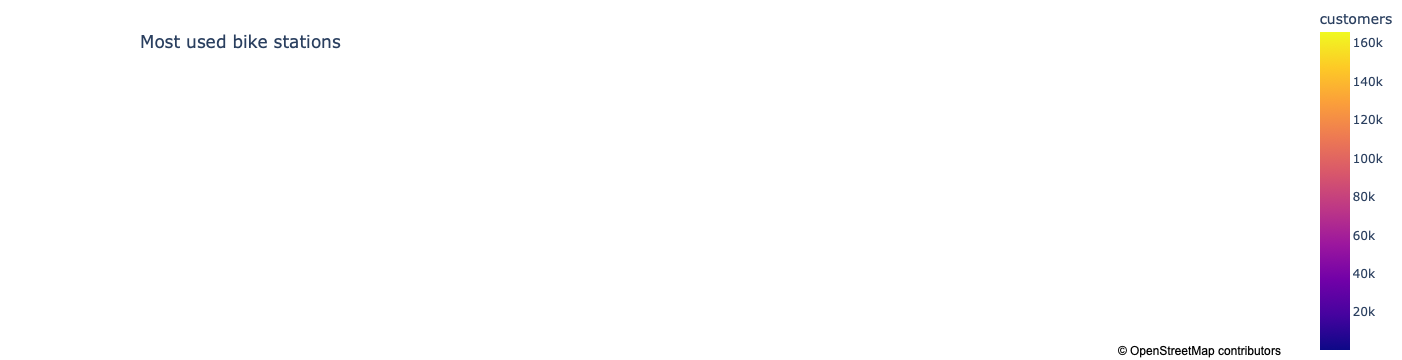

In [52]:
fig = px.scatter_mapbox(data_plot1, 
                        lat = 'end_latitude', lon = 'end_longitude', hover_name = 'end_station_id', hover_data = ['customers'],
                        color_discrete_map=['viridis'], color = 'customers', zoom=9, height=300)
fig.update_traces(
    marker={'size': 7})
fig.update_layout(

    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0},
    title={
        'text': 'Most used bike stations',
        'y':0.9,
        'x':0.1,
        'xanchor': 'auto',
        'yanchor': 'top'}
)

fig.write_html('VehicleHireMap.html')

fig.show()

In [ ]:

fig = px.density_mapbox( data_plot1, lon = "end_longitude", lat = 'end_latitude', z = 'customers', radius=8,
                        center = dict(lat=53.55, lon=9.99), 
                        zoom=10, 
                        height = 600,
                        mapbox_style = 'carto-positron')

fig.write_html('HireDensityMap.html')

fig.show()

In [ ]:
df = data_plot1
text = data_plot1['end_station_id'].astype(str) + ' ' + data_plot1['customers'].astype(str)

fig = go.Figure(data=go.Scattergeo(
  
    locationmode = "ISO-3",
    
        lon = df['end_longitude'],
        lat = df['end_latitude'],
    locations = df['end_station_id'],
        text = text,
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = df['customers'],
            cmax = df['customers'].max(),
            colorbar_title="No of Customers"
        )))

fig.update_layout(
        title = 'Most used bike stations',
        geo = dict(
            scope='europe',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

    
fig.show()

In [ ]:
fig = go.Figure(data=go.Scattergeo(
           lon = df['end_longitude'],
        lat = df['end_latitude'],
        text = text,
        mode = 'markers',
        marker_color = df['customers'],
        ))

fig.update_layout(
        title = 'Most used bike stations',
        geo_scope='europe',
    center={"lat": 45.5517, "lon": -73.7073}, zoom=9,
    )
fig.show()